# Poisoned Mushroom Dataset

We are going to take a quick tour of machine learning by working on an example dataset. The mushroom dataset
categorizes mushrooms as 'poisonous' or 'edible' and collects several descriptive properties of each mushroom example.

In [41]:
import pandas as pd
import os

## Loading the dataset

In [118]:
# These lines would load the data locally
# data_root = "./"
# filename = "mushroom.csv"
# filepath = os.path.join(data_root, filename)

# We'll fetch it directly from the web
data_url = "https://aet-cs.github.io/white/ML/lessons/mushroom.csv"
df = pd.read_csv(data_url)
df

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,...,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,...,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,...,k,NaN,w,p,w,NaN,l,w,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25981,e,f,NaN,r,f,n,f,NaN,n,NaN,...,NaN,n,p,p,w,o,p,k,v,NaN
25982,e,f,s,e,f,NaN,f,c,n,y,...,y,w,p,p,w,NaN,p,r,y,d
25983,p,f,g,e,NaN,NaN,a,c,b,b,...,y,w,NaN,p,w,o,p,h,v,m
25984,e,x,g,g,t,n,f,w,b,h,...,f,NaN,NaN,p,w,t,e,NaN,s,NaN


`describe` gives a quick overview of each feature

In [43]:
df.describe()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,25986,22513,22507,22527,22514,22536,22505,22587,22494,22418,...,22563,22413,22553,22489,22483,22497,22478,22493,22475,22502
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,14354,7674,7602,4810,12361,6986,17811,16092,13997,3679,...,10619,8580,8403,22489,15742,15713,8501,5085,8409,6573


All the features in this dataset are categorical, with between 2 and 12 categories. Except the curious `veil-type` which has only one value. Since `veil-type` has only one unique value, we'll drop it.

In [119]:
df = df.drop('veil-type', axis=1)

## Data Exploration

Show all the columns. Notice the target is the first column!

In [120]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'ruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

Get the size of the dataframe. Shape returns (rows, cols)

In [121]:
df.shape

(25986, 22)

Let's peek at the target

In [122]:
df['class']

0        e
1        p
2        e
3        e
4        e
        ..
25981    e
25982    e
25983    p
25984    e
25985    e
Name: class, Length: 25986, dtype: object

This dataset has a LOT of "N/A" datapoints. One way to clean the data is to drop all affected rows

In [123]:
df.dropna().shape

(1327, 22)

But this *significantly* reduces our dataset. Let's instead use a data imputation strategy that fills the N/A with the *mode*

In [124]:
for c in df.columns:
    df = df.fillna({c: df[c].mode()[0]})

Look at df again

In [125]:
df

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,s,y,w,p,n,o,p,w,v,d
1,p,x,y,g,t,n,f,c,b,k,...,f,s,n,c,w,n,e,w,y,g
2,e,b,y,n,t,n,f,c,b,n,...,s,s,p,w,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,s,p,w,w,n,n,w,v,d
4,e,x,f,n,t,n,a,w,n,n,...,s,k,w,w,w,o,l,w,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25981,e,f,y,r,f,n,f,c,n,b,...,s,s,n,p,w,o,p,k,v,d
25982,e,f,s,e,f,n,f,c,n,y,...,s,y,w,p,w,o,p,r,y,d
25983,p,f,g,e,f,n,a,c,b,b,...,s,y,w,w,w,o,p,h,v,m
25984,e,x,g,g,t,n,f,w,b,h,...,k,f,w,w,w,t,e,w,s,d


Let's see what the classifications are and how balanced the dataset is. Highly imbalanced datasets require special techniques to ensure valid models.

In [127]:
df['class'].value_counts()

class
e    14354
p    11632
Name: count, dtype: int64

We'll introduce a new plotting library -- "seaborn", which has some advantages over matplotlib. Here we show how to quickly make a histogram from a dataframe. Seaborn works nicely with pandas dataframes.

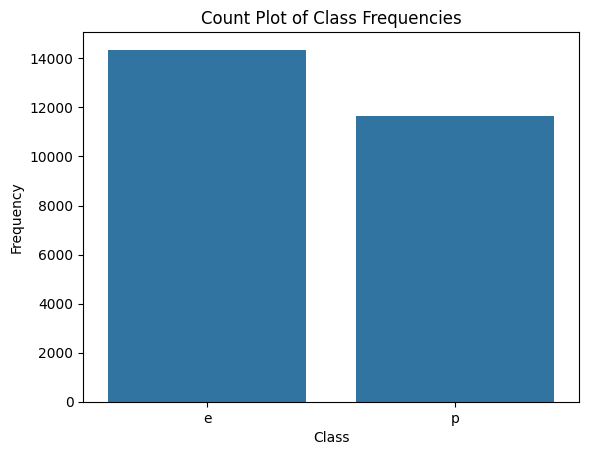

In [128]:
import seaborn as sns
from matplotlib import pyplot as plt

# Count plot
sns.countplot(x='class', data=df)
plt.title('Count Plot of Class Frequencies')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


As another example let's plot the "cap color" feature.

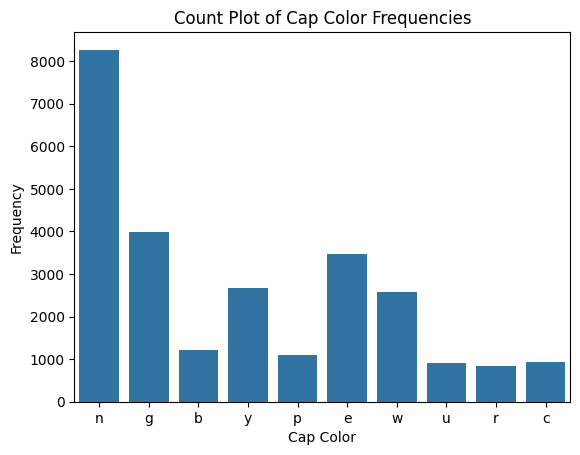

In [129]:
# Count plot
sns.countplot(x='cap-color', data=df, )
plt.title('Count Plot of Cap Color Frequencies')
plt.xlabel('Cap Color')
plt.ylabel('Frequency')
plt.show()


I wonder how the color correlates to the outcome -- are some color more poisonous? We'll do some pandas work to make this summary for us. (Here's a nice overview of `groupby`: https://builtin.com/data-science/pandas-groupby)

In [175]:
# Count observations by color and toxicity
counts = df.groupby(['cap-color', 'class']).size().reset_index(name='count')

In [176]:
counts

,cap-color,class,count
0,b,e,660
1,b,p,551
2,c,e,526
3,c,p,413
4,e,e,1834
5,e,p,1627
6,g,e,2226
7,g,p,1765
8,n,e,2673
9,n,p,2137


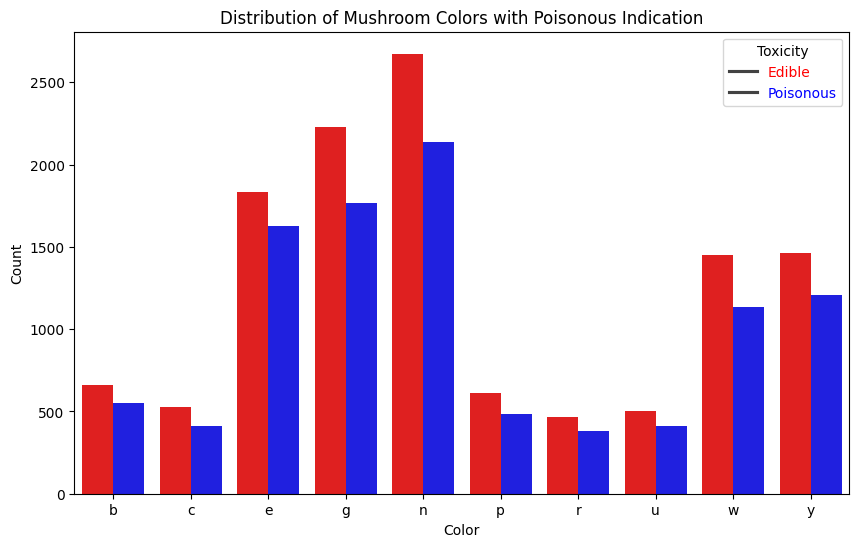

In [165]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='cap-color', y='count', hue='class', data=counts, palette={'p': 'blue', 'e': 'red'})

# Add plot title and labels
plt.title('Distribution of Mushroom Colors with Poisonous Indication')
plt.xlabel('Color')
plt.ylabel('Count')


# Customize the legend
legend = plt.legend(title='Toxicity', labels=['Edible', 'Poisonous'])
legend.get_texts()[0].set_color('red')  # Edible in red
legend.get_texts()[1].set_color('blue')   # Poisonous in blue


# Show the plot
plt.show()

In [143]:
df.describe()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,25986,25986,25986,25986,25986,25986,25986,25986,25986,25986,...,25986,25986,25986,25986,25986,25986,25986,25986,25986,25986
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,14354,11147,11081,8269,15833,10436,21292,19491,17489,7247,...,14548,14042,12153,11836,19245,19202,12009,8578,11920,10057


In [144]:
# Count observations by odor and toxicity
counts = df.groupby(['odor', 'class']).size().reset_index(name='count')

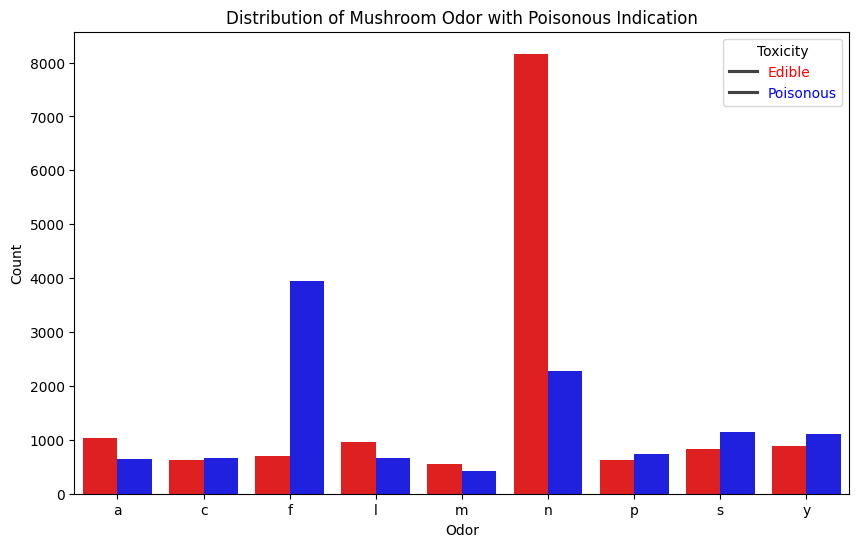

In [145]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='odor', y='count', hue='class', data=counts, palette={'p': 'blue', 'e': 'red'})

# Add plot title and labels
plt.title('Distribution of Mushroom Odor with Poisonous Indication')
plt.xlabel('Odor')
plt.ylabel('Count')

# Customize the legend
legend = plt.legend(title='Toxicity', labels=['Edible', 'Poisonous'])
legend.get_texts()[0].set_color('red')  # Edible in red
legend.get_texts()[1].set_color('blue')   # Poisonous in blue

# Show the plot
plt.show()

## Correlation matrix heat map

Let's get a quick visual representation of the relationshop between features in this dataset. We'll use a version of a Chi-Squared test on all pairs $(n,m)$ of features in the dataset, including the target. (Heat maps for continuous data are easy to plot -- because of the categories we have to do some extra work here. You can treat `cramers_v` as a black box for now.)

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to numeric values for plotting
corr_matrix = corr_matrix.astype(float)
corr_matrix

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,0.999922,0.030397,0.043075,0.020084,0.089974,0.465191,0.001138,0.063779,0.122908,0.088500,...,0.129749,0.102529,0.050202,0.044377,0.005063,0.022175,0.092049,0.124672,0.063370,0.053764
cap-shape,0.030397,1.000000,0.011547,0.020761,0.014305,0.020779,0.008688,0.017270,0.017995,0.020523,...,0.011107,0.017404,0.018379,0.017432,0.017128,0.007926,0.012183,0.016205,0.018208,0.015867
cap-surface,0.043075,0.011547,1.000000,0.022589,0.008736,0.024878,0.015569,0.027291,0.020465,0.025335,...,0.012902,0.012060,0.022897,0.021619,0.012788,0.016706,0.014214,0.016301,0.022058,0.020441
cap-color,0.020084,0.020761,0.022589,1.000000,0.021542,0.022804,0.017171,0.023427,0.021974,0.024858,...,0.019545,0.016909,0.024867,0.020831,0.017487,0.015235,0.023721,0.019681,0.023478,0.022749
ruises,0.089974,0.014305,0.008736,0.021542,0.999919,0.043431,0.002767,0.015149,0.011158,0.041328,...,0.025761,0.021659,0.027672,0.031543,0.006508,0.011759,0.037341,0.034545,0.014283,0.026531
odor,0.465191,0.020779,0.024878,0.022804,0.043431,1.000000,0.017001,0.026458,0.046978,0.027601,...,0.027740,0.031568,0.025946,0.023086,0.015490,0.019458,0.030861,0.032236,0.026293,0.021654
gill-attachment,0.001138,0.008688,0.015569,0.017171,0.002767,0.017001,0.999870,0.004789,0.007753,0.023883,...,0.008627,0.011742,0.020285,0.021662,0.010471,0.004408,0.010966,0.010641,0.012992,0.012999
gill-spacing,0.063779,0.017270,0.027291,0.023427,0.015149,0.026458,0.004789,0.999897,0.011227,0.021896,...,0.011253,0.014541,0.022406,0.028543,0.008439,0.013913,0.013069,0.018936,0.027893,0.029246
gill-size,0.122908,0.017995,0.020465,0.021974,0.011158,0.046978,0.007753,0.011227,0.999913,0.031603,...,0.008155,0.009570,0.027692,0.030796,0.004786,0.008013,0.039065,0.041701,0.025668,0.023956
gill-color,0.088500,0.020523,0.025335,0.024858,0.041328,0.027601,0.023883,0.021896,0.031603,1.000000,...,0.030065,0.031451,0.023405,0.027307,0.019835,0.019987,0.033363,0.031731,0.029769,0.026966


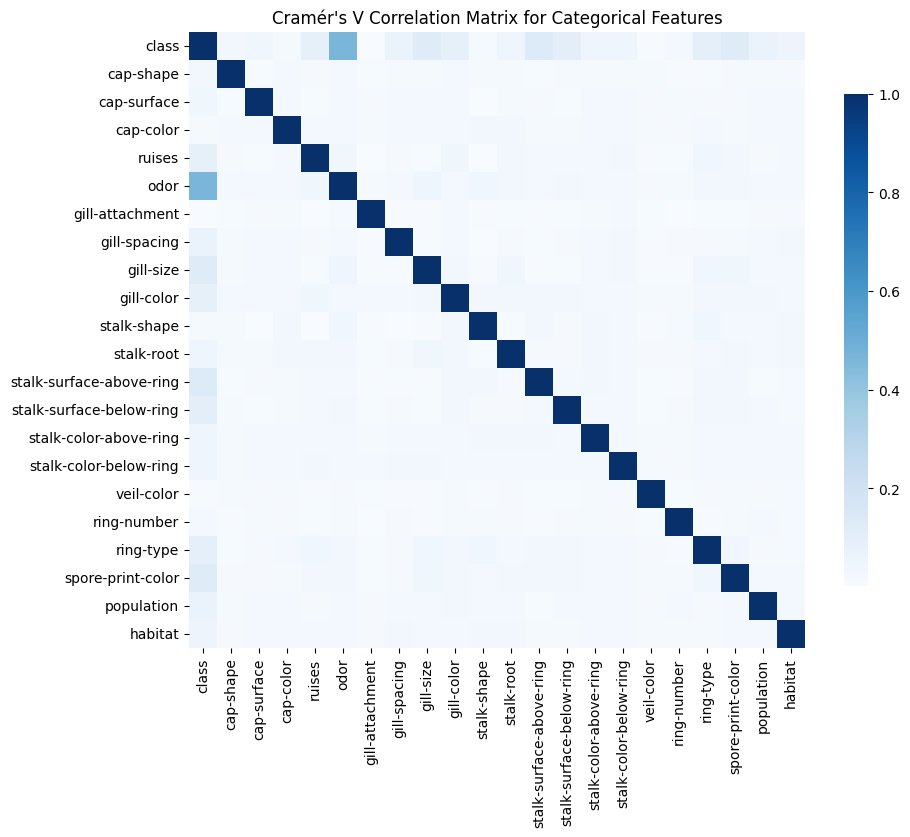

In [63]:
# Plotting the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='Blues', square=True, cbar_kws={"shrink": .8})
plt.title("Cramér's V Correlation Matrix for Categorical Features")
plt.show()

Which features seem to be important?

In [64]:
corr_matrix['class'][corr_matrix['class']>0.1]

class                       0.999922
odor                        0.465191
gill-size                   0.122908
stalk-surface-above-ring    0.129749
stalk-surface-below-ring    0.102529
spore-print-color           0.124672
Name: class, dtype: float64

## Data Modeling

We're finally ready to do some data modeling using scikit-learn. In this cell we import some methods we'll use, reload the data frame (just to be safe), re-pre-process-it, and one-hot-encode all the categorical variables.

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv(data_url)

# drop the useless feature
df = df.drop('veil-type', axis=1)

# drop the target from X -- and store it as y
X = df.drop('class', axis = 1)
y = df['class']

# one-hot encode all columns at once
X = pd.get_dummies(X)

# show it to me
X.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,25986,25986,25986,25986,25986,25986,25986,25986,25986,25986,...,25986,25986,25986,25986,25986,25986,25986,25986,25986,25986
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,23726,24509,19264,23074,24518,18312,19762,23825,19466,18384,...,22365,17577,21675,19413,21040,23275,24278,22840,24129,24425


### Decision Tree Classifier

Our first model is a decision tree, which is one of the oldest algorithms for classifying observations. Before we create any models, we *always* create a train-test split so there is unseen testing data that wasn't available when the model was training.

In [151]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
results = pd.DataFrame([y_pred, y_test])
results

,0,1,2,3,4,5,6,7,8,9,...,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197
0,p,p,e,p,p,p,e,e,e,p,...,p,e,p,e,p,p,p,p,e,p
1,p,e,e,p,p,p,e,p,e,p,...,p,p,p,e,e,e,p,p,e,p


There are many metrics for evaluating categorical models, and they are sometimes at odds. Accuracy is simplistic and obscures what could be more important -- are there more false positives or more false negatives? And which is more important? In a task to identify poisonous mushrooms, a false negative (labeling a 'p' as an 'e') is deadly. The "recall" on "p" below captures this value. This measures the percent of poisonous mushrooms you have correctly labeled as poisonous.

Recall is not everything, though. You can easily get perfect "poison" recall by labeling every mushroom as poisonous! Precision measures the fraction of mushrooms you label as poisonous which actually are. 

The $F_1$-score is a type of geometric mean between precision and recall and strikes a bit of a balance between the two.

In this notebook, look first at "p-recall", but keep an eye on the other metrics.

In [153]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6671796844940362
Classification Report:
              precision    recall  f1-score   support

           e       0.70      0.69      0.70      2873
           p       0.62      0.64      0.63      2325

    accuracy                           0.67      5198
   macro avg       0.66      0.66      0.66      5198
weighted avg       0.67      0.67      0.67      5198



A confusion matrix is a nice way to really show everything that a classifier is doing. The main diagonal are the numbers of correctly classified observations. The off-diagonals are errors. Unfortunately this simple version is unlabeled

In [157]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)

array([[1978,  895],
       [ 835, 1490]])

With a bit more work we can get a label.

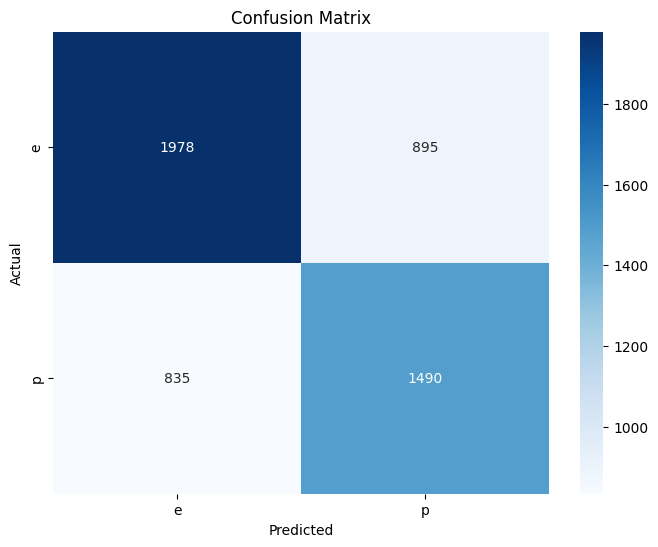

In [158]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Testing more methods

First I'll define a helper method that takes any dataset and a classifier "clf" and
* fits the model to the training data
* applies the model to the test data
* gets an accuracy score and a classification report for the test data

In [159]:
def classifier_tryout(clf, X_train, y_train, X_test, y_test):
	clf.fit(X_train, y_train)

	# Make predictions
	y_pred = clf.predict(X_test)

	# Evaluate the model
	accuracy = accuracy_score(y_test, y_pred)
	print(f"Accuracy: {accuracy}")

	print("Classification Report:")
	print(classification_report(y_test, y_pred))

In what follows, we run several very different models and compare their performance. We won't go into much detail about the models. But note how the scikit-learn API makes dealing with each of the models very similar

### Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
classifier_tryout(clf, X_train, y_train, X_test, y_test)

Accuracy: 0.7464409388226241
Classification Report:
              precision    recall  f1-score   support

           e       0.76      0.80      0.78      2873
           p       0.73      0.69      0.71      2325

    accuracy                           0.75      5198
   macro avg       0.74      0.74      0.74      5198
weighted avg       0.75      0.75      0.75      5198



### Support Vector Machines

In [116]:
from sklearn.svm import SVC

# Initialize the RandomForestClassifier
clf = SVC(random_state=42, kernel='rbf')
classifier_tryout(clf, X_train, y_train, X_test, y_test)

Accuracy: 0.7504809542131589
Classification Report:
              precision    recall  f1-score   support

           e       0.76      0.79      0.78      2873
           p       0.73      0.70      0.71      2325

    accuracy                           0.75      5198
   macro avg       0.75      0.75      0.75      5198
weighted avg       0.75      0.75      0.75      5198



### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression
clf = LogisticRegression(random_state=42)
classifier_tryout(clf, X_train, y_train, X_test, y_test)

Accuracy: 0.746056175452097
Classification Report:
              precision    recall  f1-score   support

           e       0.76      0.78      0.77      2873
           p       0.72      0.70      0.71      2325

    accuracy                           0.75      5198
   macro avg       0.74      0.74      0.74      5198
weighted avg       0.75      0.75      0.75      5198



### k-Nearest Neighbors

In [102]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier
clf = KNeighborsClassifier(weights='uniform')
classifier_tryout(clf, X_train, y_train, X_test, y_test)

Accuracy: 0.6854559445940747
Classification Report:
              precision    recall  f1-score   support

           e       0.70      0.76      0.73      2873
           p       0.67      0.60      0.63      2325

    accuracy                           0.69      5198
   macro avg       0.68      0.68      0.68      5198
weighted avg       0.68      0.69      0.68      5198



### GradientBoost 

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)
classifier_tryout(clf, X_train, y_train, X_test, y_test)

Accuracy: 0.7518276260100039
Classification Report:
              precision    recall  f1-score   support

           e       0.77      0.79      0.78      2873
           p       0.73      0.70      0.72      2325

    accuracy                           0.75      5198
   macro avg       0.75      0.75      0.75      5198
weighted avg       0.75      0.75      0.75      5198



### Neural Network

In [104]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
clf = MLPClassifier(random_state=42, hidden_layer_sizes=(1000,10,), learning_rate='adaptive')
classifier_tryout(clf, X_train, y_train, X_test, y_test)

Accuracy: 0.7052712581762216
Classification Report:
              precision    recall  f1-score   support

           e       0.73      0.73      0.73      2873
           p       0.67      0.67      0.67      2325

    accuracy                           0.71      5198
   macro avg       0.70      0.70      0.70      5198
weighted avg       0.71      0.71      0.71      5198



## Conclusion

This notebook gave a quick overview of the full data analysis workflow on a real world dataset. Data ingesting and cleaning; exploratory data analysis; modeling. There is much we can do next by trying to optimize models, but that is beyond the scope of this notebook. Also, we only looked at categorical data here -- continuous/quantitative data is a bit different but not much (linear regression is the first stop with continuous data.)

Which model above do you think is the best? Which one would you start with to try to get even better results?

As an application, find your own dataset and try to mirror the process we took here. Not all the steps in this notebook will apply directly to whatever dataset you find, but see what you can come up with and how well you can model the target in your data!